In [89]:
import numpy as np
import matplotlib.pyplot as plt
from monai.losses.dice import DiceCELoss
from monai.losses.dice import DiceLoss
import torch.nn as nn
import torch

In [90]:

def create_a_box(image_size, box_size):
    background = np.zeros((image_size,image_size))
    box = np.ones((box_size,box_size))
    background[:len(box), :len(box)] = box
    return torch.Tensor(background).unsqueeze(0)


In [91]:
'''
Create a few artificial images of size 128
'''

# box of size 1 
box_1 = create_a_box(128, 1)

# box of size 4
box_4 = create_a_box(128, 4)

# box of size 16
box_16 = create_a_box(128, 16)

# box of size 64
box_64 = create_a_box(128, 64)

# box of size 96
box_96 = create_a_box(128, 96)

# box of size 120
box_120 = create_a_box(128, 120)

# box of size 128
box_128 = create_a_box(128, 128)


'''
Create a few artificial images of size 16
'''


# box of size 1 
BOX_1 = create_a_box(16, 1)

# box of size 4
BOX_2 = create_a_box(16, 2)

# box of size 16
BOX_3 = create_a_box(16, 3)

# box of size 64
BOX_4 = create_a_box(16, 4)

# box of size 64
BOX_6 = create_a_box(16, 6)

# box of size 64
BOX_18 = create_a_box(16, 8)

# box of size 64
BOX_12 = create_a_box(16, 12)

# box of size 64
BOX_16 = create_a_box(16, 16)


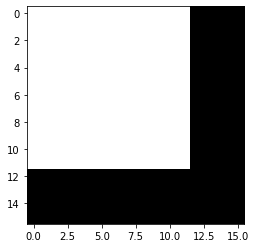

In [93]:
'''
Plot a box
'''

plt.imshow(BOX_12.permute(1,2,0), cmap="gray")



In [94]:
dice_ce_loss = DiceCELoss(batch=False, softmax = True, lambda_dice =  0, lambda_ce = 1, reduction = "sum", include_background=False)
bce_loss = nn.BCELoss()
dice_loss = DiceLoss(batch=False, to_onehot_y = False, reduction = "sum")


def dice(input, target, epsilon = 1e-7):

    intersection = torch.sum(target * input)
    union = torch.sum(target) + torch.sum(input)

    return 1 - ( (2 * intersection + epsilon) / (union + epsilon) )

def dice_bce(input, target, lambda_dice, lambda_ce):

    Dloss = dice(input, target)

    CEloss = bce_loss(input, target)

    return lambda_dice * Dloss + lambda_ce * CEloss



In [95]:
prediction = BOX_2
ground_truth = BOX_3

'''
CE Loss
'''

output_ce = bce_loss(prediction, ground_truth)

print(output_ce)


'''
dice
'''

output_dice = dice(prediction, ground_truth)

print(output_dice)


'''
DICE Loss
'''

output_dice = dice_loss(prediction, ground_truth)

print(output_dice)


'''
DICE CE Loss
'''

output_ce_dice = dice_ce_loss(prediction, ground_truth)

print(output_ce_dice)


tensor(1.9531)
tensor(0.3846)
tensor(1.4000)
tensor(42.7506)
